In [15]:
#pwd

**Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer # Fixed import statement
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.svm import NuSVC
from sklearn.preprocessing import LabelEncoder

**load dataset**

In [4]:
df = pd.read_csv('/content/drive/MyDrive/project sms spam/Dataset/spam.csv', encoding='latin-1')

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [9]:
df.shape

(5572, 5)

In [10]:
df.size

27860

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [14]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [17]:
new_column_names = ["label", "message"] + list(df.columns[2:])
df.columns = new_column_names

In [18]:
df.head()

,label,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [20]:
df.isnull().values.any()

True

In [22]:
df.isnull().sum()

label            0
message          0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [27]:
df.duplicated().values.any()

True

In [23]:
df.duplicated().sum()

403

In [28]:
df.drop_duplicates(inplace = True)

In [29]:
df.describe()

,label,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5169,5169,43,10,5
unique,2,5169,43,10,5
top,ham,"Go until jurong point, crazy.. Available only ...",PO Box 5249,"MK17 92H. 450Ppw 16""","just Keep-in-touch\"" gdeve.."""
freq,4516,1,1,1,1


In [30]:
df.head()

,label,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**Record Visualization**

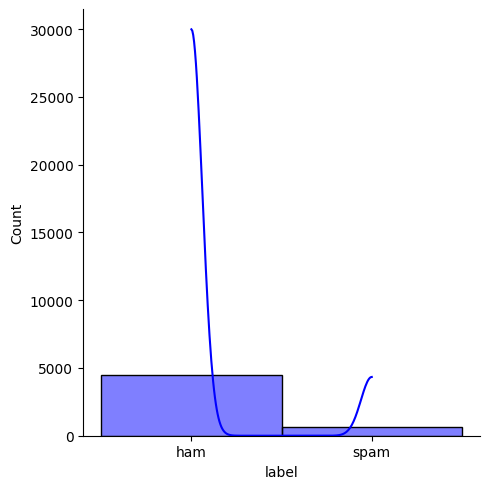

In [33]:
sns.displot(df.label, kde = True, color = "blue")

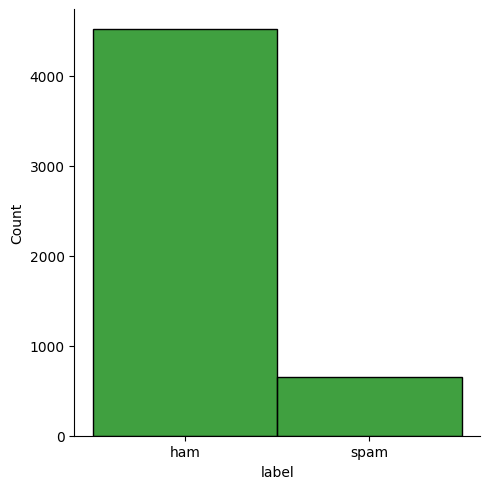

In [32]:
sns.displot(df.label, color = "green")

**LabelEncoder to encode categorical variable(label) to numeric**

In [35]:
encoder = LabelEncoder()
df["label"] = encoder.fit_transform(df["label"].values)

In [36]:
df.head()

,label,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**TF-IDF Vectorization**

In [37]:
vectorizer = TfidfVectorizer()

In [39]:
X = vectorizer.fit_transform(df["message"])
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
y = df["label"]

In [41]:
X.shape

(5169, 8672)

In [42]:
y.shape

(5169,)

In [43]:
df.count()

label         5169
message       5169
Unnamed: 2      43
Unnamed: 3      10
Unnamed: 4       5
dtype: int64

**Spam Lanel Visualization on the basis of records in pie-chart**

In [44]:
p, k = len(df[df["label"] == 0]), len(df[df["label"] == 1])

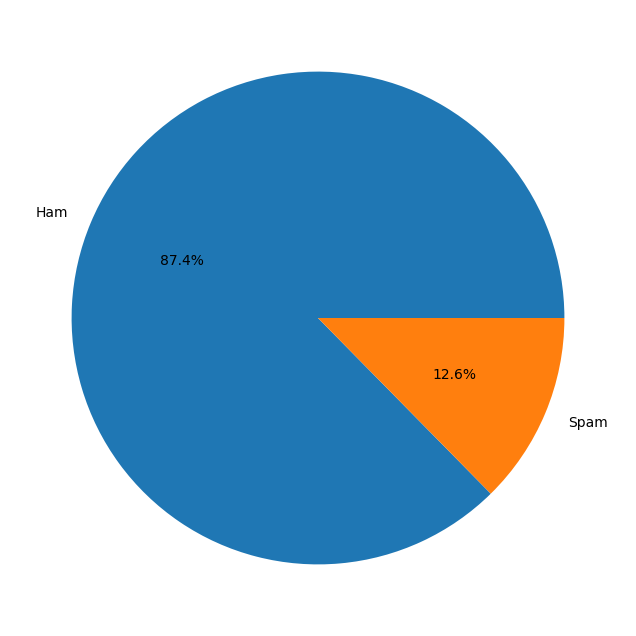

In [48]:
label = np.array(["Ham", "Spam"])
values = np.array([p, k])
plt.figure(figsize = (8, 8))
plt.pie(values, labels = label, autopct = "%1.1f%%")
plt.show()

**Preprocess the Data**

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

**Train Naive Bayes Classifier**

In [50]:
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)

MultinomialNB()

In [51]:
nb_predictions = naive_bayes_model.predict(X_test)

In [52]:
print("Naive Bayes Model :")
print( confusion_matrix(y_test, nb_predictions))
print( classification_report(y_test, nb_predictions))
print("Accuracy Score : ", accuracy_score(y_test, nb_predictions))
print("Precision Score : ", precision_score(y_test, nb_predictions))
print("Recall Score : ", recall_score(y_test, nb_predictions))
print("F1 Score : ", f1_score(y_test, nb_predictions))

Naive Bayes Model :
[[889   0]
 [ 46  99]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       889
           1       1.00      0.68      0.81       145

    accuracy                           0.96      1034
   macro avg       0.98      0.84      0.89      1034
weighted avg       0.96      0.96      0.95      1034

Accuracy Score :  0.9555125725338491
Precision Score :  1.0
Recall Score :  0.6827586206896552
F1 Score :  0.8114754098360656


**Train Logistic Regression Model**

In [53]:
logistic_regression_model = LogisticRegression()

In [54]:
logistic_regression_model.fit(X_train, y_train)

LogisticRegression()

In [55]:
lr_predictions = logistic_regression_model.predict(X_test)

In [56]:
print("Logostic Regression Model: ")
print( confusion_matrix(y_test, lr_predictions))
print( classification_report(y_test, lr_predictions))
print("Accuracy score : ", accuracy_score(y_test, lr_predictions))
print("Precision Score : ", precision_score(y_test, lr_predictions))
print("Recall Score : ", recall_score(y_test, lr_predictions))
print("f1 Score : ", f1_score(y_test, lr_predictions))

Logostic Regression Model: 
[[886   3]
 [ 43 102]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       889
           1       0.97      0.70      0.82       145

    accuracy                           0.96      1034
   macro avg       0.96      0.85      0.90      1034
weighted avg       0.96      0.96      0.95      1034

Accuracy score :  0.9555125725338491
Precision Score :  0.9714285714285714
Recall Score :  0.7034482758620689
f1 Score :  0.8160000000000001


**Train Vector Machine (SVM) Model**

In [63]:
from sklearn.svm import SVC
svm_model = SVC(kernel = 'linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [64]:
svm_predictions = svm_model.predict(X_test)

In [66]:
print("Support Vector Machine (SVM) Model: ")
print( confusion_matrix(y_test, svm_predictions))
print( classification_report(y_test, svm_predictions))
print("Accuracy score : ", accuracy_score(y_test, svm_predictions))
print("Precision Score : ", precision_score(y_test, svm_predictions))
print("Recall Score : ", recall_score(y_test, svm_predictions))
print("f1 Score : ", f1_score(y_test, svm_predictions))

Support Vector Machine (SVM) Model: 
[[886   3]
 [ 14 131]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       889
           1       0.98      0.90      0.94       145

    accuracy                           0.98      1034
   macro avg       0.98      0.95      0.96      1034
weighted avg       0.98      0.98      0.98      1034

Accuracy score :  0.9835589941972921
Precision Score :  0.9776119402985075
Recall Score :  0.903448275862069
f1 Score :  0.939068100358423
